In [1]:
# Importing Required Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HR_Data.xlsb",engine='pyxlsb')

In [3]:
# get random 5 samples
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
4267,0.64,0.89,3,175,3,1,0,0,product_mng,high
11165,0.54,0.68,6,249,5,0,0,0,product_mng,medium
804,0.81,0.95,5,266,5,0,1,0,technical,medium
6505,0.84,0.96,3,162,3,0,0,0,sales,medium
610,0.09,0.95,7,256,4,0,1,0,marketing,medium


In [4]:
# shave gives row & columns values here there are total 14999 rows & 10 columns
data.shape

(14999, 10)

In [5]:
# check for null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



From info function we can see that null values are not present & out of 10 columns 6 columns are of integer datatpye, 2 columns are float data type and 2 columns are of object data type.

In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Describe gives all statistical information.

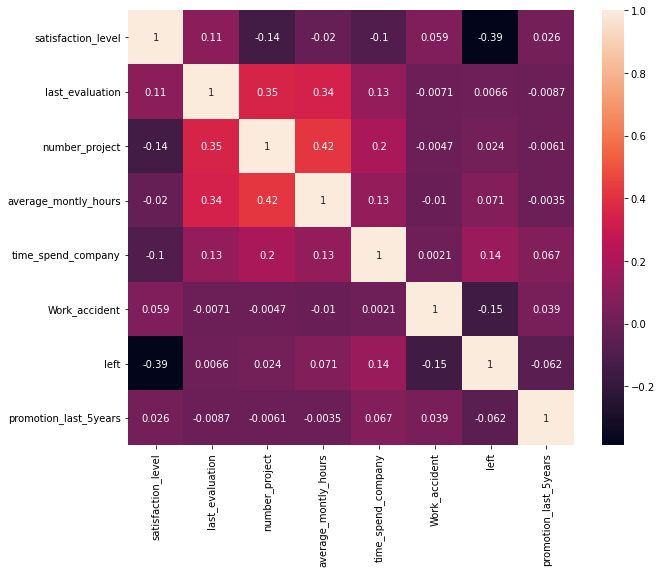

In [9]:
# correlation of independent features with dependent features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True);

There is no multicolinearity is present between independent features.

# Data Analysis & Visualization 

In [11]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

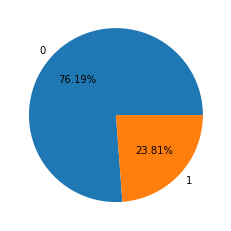

In [12]:
plt.pie(data["left"].value_counts(),labels=data['left'].value_counts().index,autopct='%1.2f%%');

From above pie diagram we can see that 76.19% peope not left & 23.81% left.

In [13]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

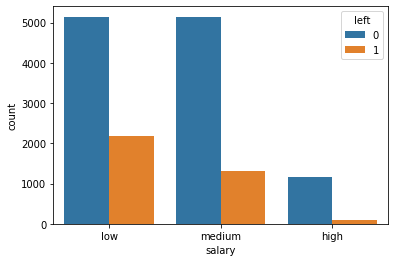

In [14]:
sns.countplot(x='salary', hue='left',data=data);

From above graph we can see that Highest Number of employees who leave the job are from low salary category and lowest nnumber of employees from high salary category.

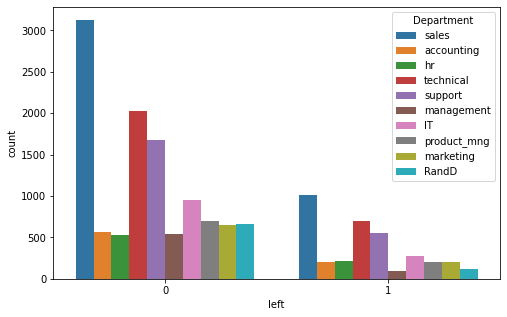

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='left', hue='Department',data=data);

From above plot we can see that highest number of employees who left the  job are from Sales Department and lowest number of employees who left the job from management department

In [20]:
data.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

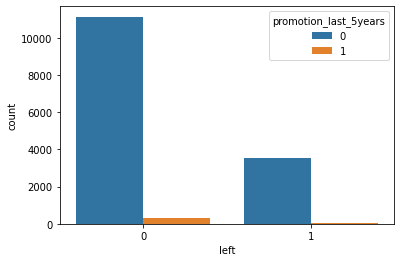

In [18]:
sns.countplot(x='left', hue='promotion_last_5years',data=data);

From above plot we can say that people left only if they are not promoted in last 5 years

# 1. EDA

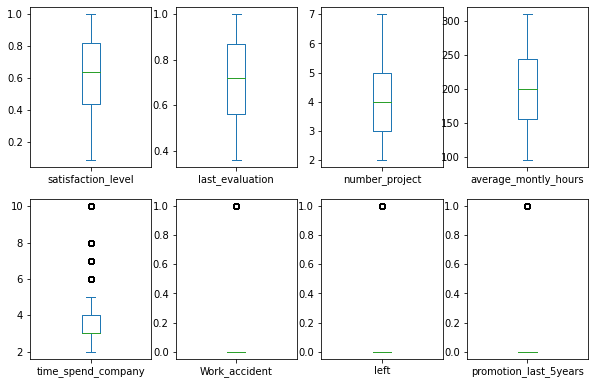

In [17]:
# Handling the outliers
data.plot(kind='box', subplots=True, figsize=(10,10),layout=(3,4))
plt.show()


**Very few outliers are detected, So there is no need to handle the outliers**

In [21]:
chr_=data.select_dtypes("object")
chr_.columns

Index(['Department', 'salary'], dtype='object')

In [22]:
print(data["Department"].unique())
print()
print("unique_val :",data["Department"].nunique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

unique_val : 10


In [23]:
print(data["salary"].unique())
print()
print("unique_val :",data["salary"].nunique())

['low' 'medium' 'high']

unique_val : 3


**Handling The Categorical Data**

There are different types of techniques used for categorical data handline such as One-Hot Encoder, LabelEncoder, OrdinalEncoder

In [28]:
# Replacing categorical data with the integer 

In [24]:
data['salary']= data['salary'].map({'high':2, 'medium':1, 'low':0})

In [25]:
data['salary'].unique()

array([0, 1, 2])

In [26]:
data['Department']=data['Department'].map({'sales':0, 'accounting':1, 'hr':2, 
'technical':3, 'support':4, 'management':5,'IT':6, 'product_mng':7,
                                 'marketing':8, 'RandD':9})

In [27]:
data['Department'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
# No categorical data present
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1


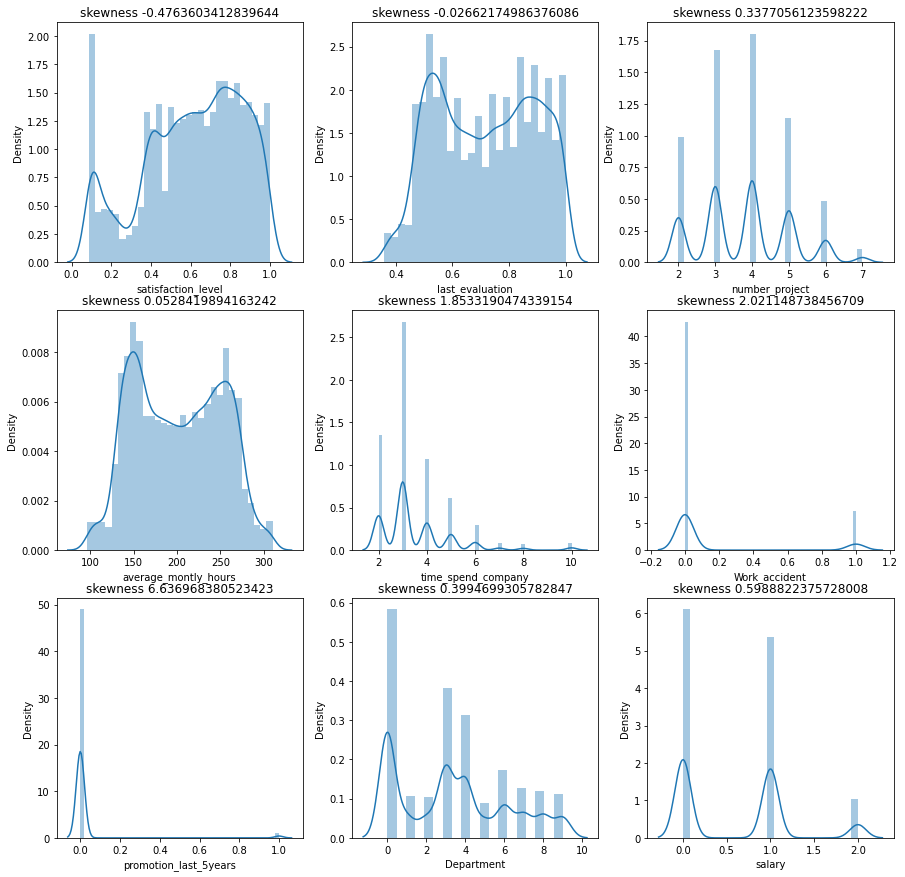

In [31]:
# Distribution & skewness
from scipy.stats import skew
k=0
plt.figure(figsize=(15,15))
for col in data.drop('left',axis=1):    
    k=k+1
    plt.subplot(3,3,k)    
    sns.distplot(data[col])
    plt.title("skewness"+' '+str(data[col].skew()))

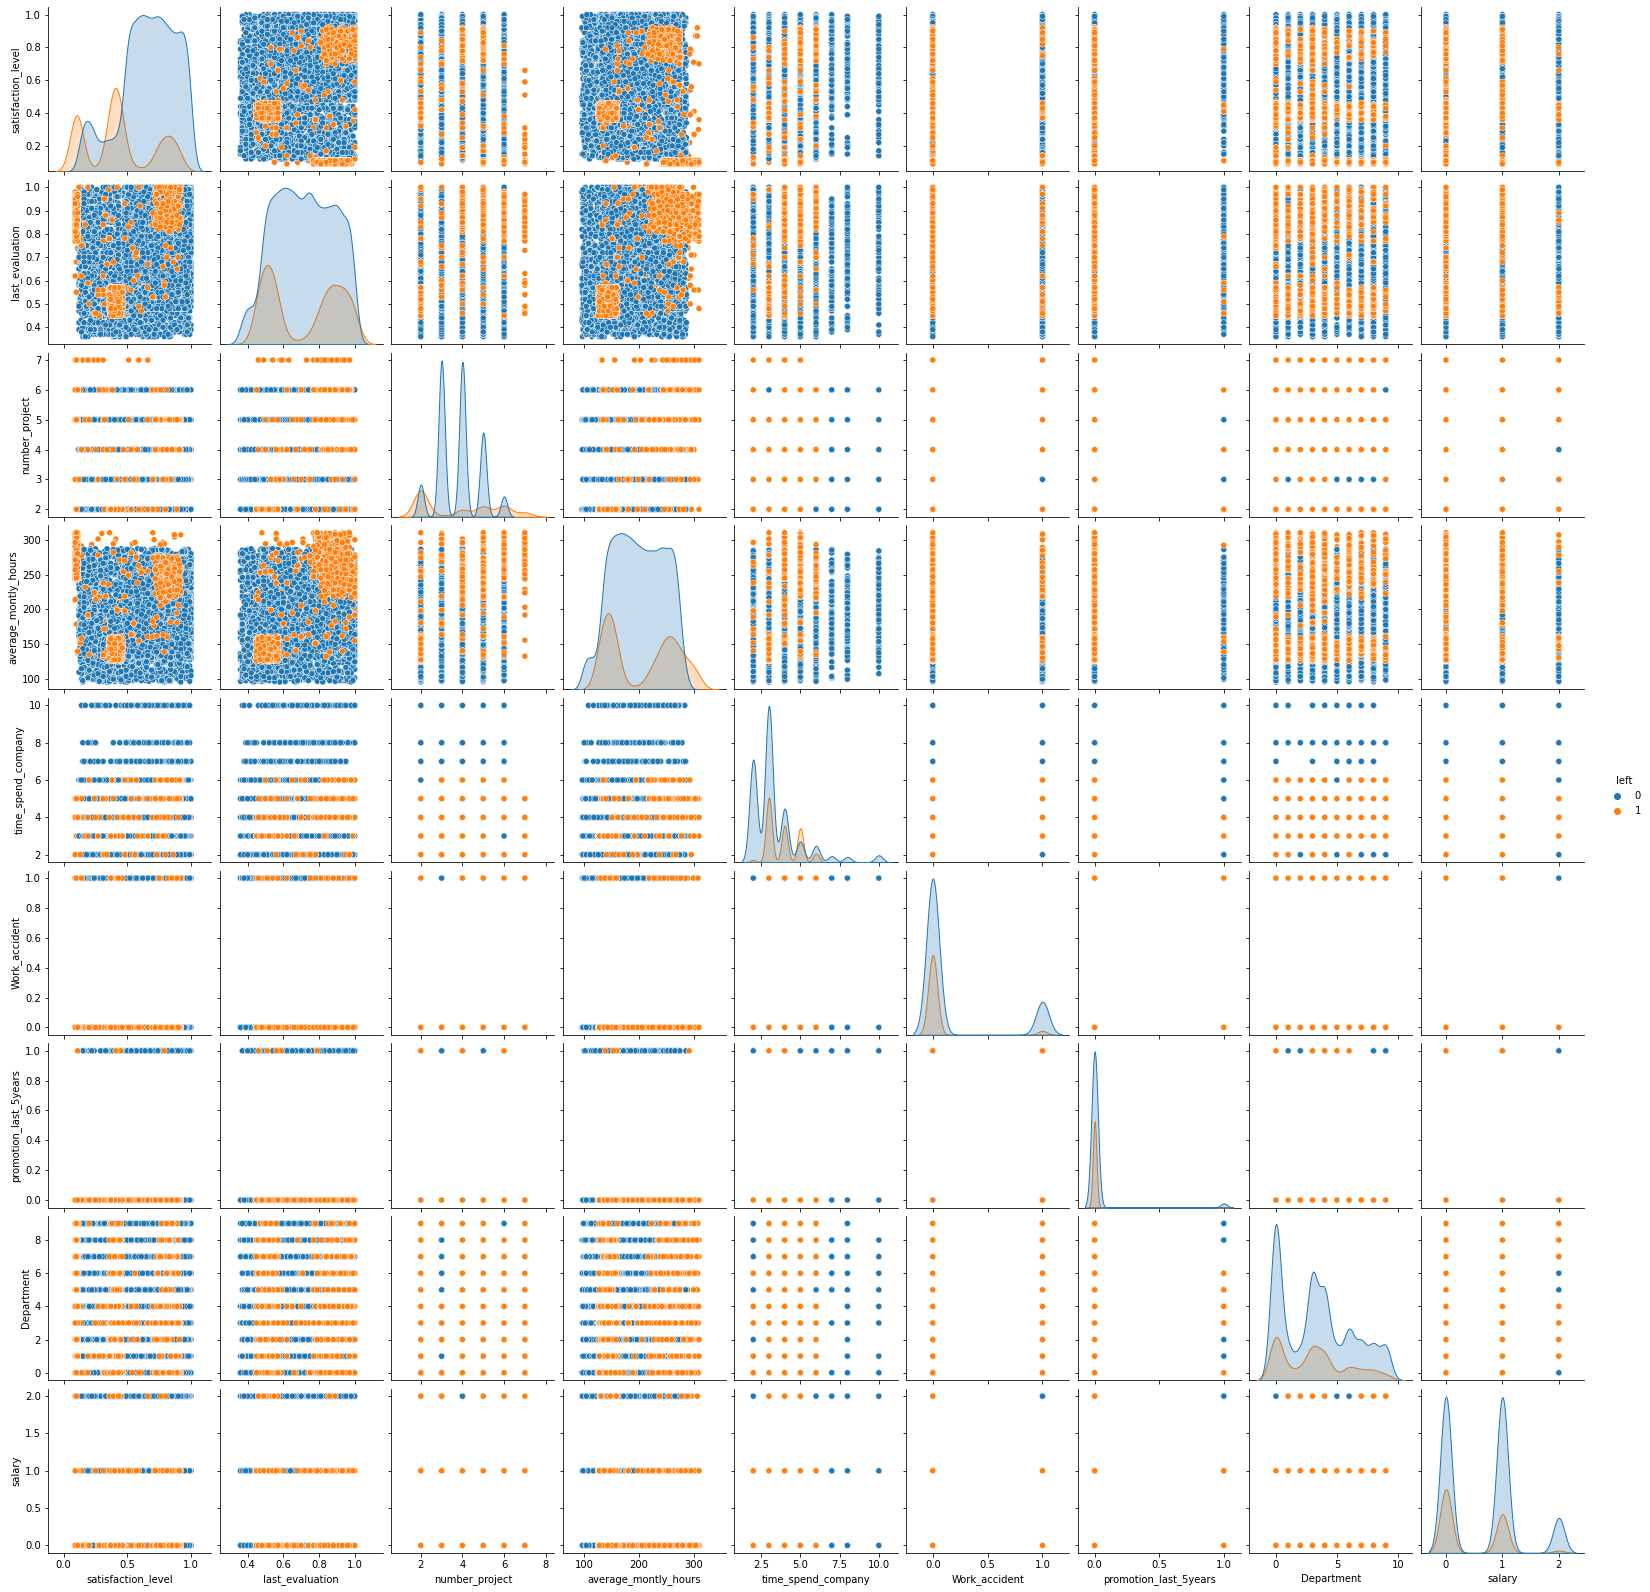

In [32]:
# visualization of correlation of features & label
sns.pairplot(data,hue='left');

Here we can see that there is no such a great correlation/pattern is observed between dependent & independent feature, so that we will try differnt models to get the best score.

# 2. Model Building

In [33]:
X = data.drop("left",axis=1)
y= data.left

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

### LogisticRegression

In [ ]:
#-----------------------------------checking assumptions---------------------------------------------------------
# The Response Variable is Binary
# The Observations are Independent
# There is No Multicollinearity Among Explanatory Variables
#There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable.

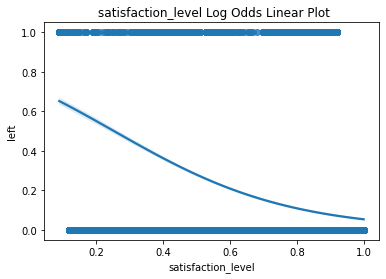

In [35]:
sat_level = sns.regplot(x= data['satisfaction_level'], y=data['left'], data= data, logistic= True).set_title(" satisfaction_level Log Odds Linear Plot");
sat_level;

Text(0.5, 1.0, 'Work_accident Log Odds Linear Plot')

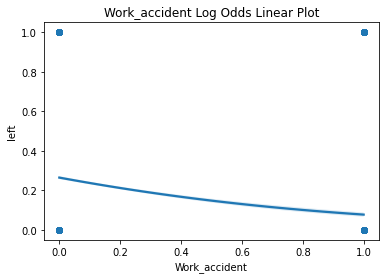

In [36]:
Work_accident = sns.regplot(data['Work_accident'], y=data['left'], data= data, logistic= True).set_title("Work_accident Log Odds Linear Plot")
Work_accident

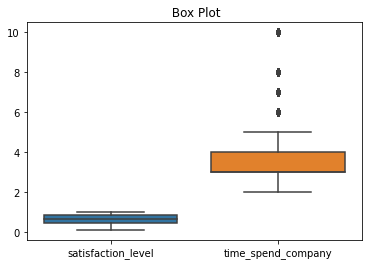

In [37]:
sns.boxplot(data= data[['satisfaction_level', 'time_spend_company']]).set_title(" Box Plot");

**No extreme outliers detected**

In [38]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred=lr.predict(X_test)

In [40]:
lr.score(X_train,y_train)

0.7917896942565958

In [41]:
lr.score(X_test,y_test)

0.792

Here we are getting the 0.792 test score

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

lr=LogisticRegression()
solvers = ['lbfgs', 'liblinear','newton-cg']
penalty = ['l2',"l1"]
c_values = [100, 10, 1.0, 0.1, 0.01]


fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
grid = dict(solver=solvers,penalty=penalty,C=c_values)

model=GridSearchCV(estimator=lr,
                   param_grid=grid,
                   scoring='accuracy',
                   verbose=1,cv=fold)

model.fit(X_train, y_train)

print(model.best_params_)
print(model.best_score_)
print(model.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7969326890355952
LogisticRegression(C=100)


In [ ]:
new_lr=LogisticRegression(C=100, solver='liblinear')
new_lr.fit(X_train,y_train)
y_pred=new_lr.predict(X_test)

In [ ]:
lr_score=new_lr.score(X_test,y_test)
precision_score_lr=(precision_score(y_test,y_pred))
recall_score_lr=(recall_score(y_test,y_pred))
f1_score_lr=(f1_score(y_test,y_pred))
roc_auc_score_lr=(roc_auc_score(y_test,y_pred))

In [ ]:
print("logistic_accuracy_score :",lr_score)
print("pricision :",precision_score_lr)
print("recall :",recall_score_lr)
print("f1_score :",f1_score_lr)
print("roc_auc_score :",roc_auc_score_lr)

logistic_accuracy_score : 0.7917777777777778
pricision : 0.5790297339593115
recall : 0.35645472061657035
f1_score : 0.4412641621943948
roc_auc_score : 0.639376984802797


In [ ]:
# Confusion matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,370,668
not left,269,3193


**Our aim is FP & TP shoul be low but here it's not low so logistic model not perform well.**

In [ ]:
# calculating performance measure
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3462
           1       0.58      0.36      0.44      1038

    accuracy                           0.79      4500
   macro avg       0.70      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



### Support Vector

In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(X_train,y_train)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
svc_score=accuracy_score(y_test,y_pred)
svc_score

0.7902222222222223

**SVC also give the almost same score as logistic regrssion which is 79.02%**

#### GridSearchCV



```
# fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
kernel=['linear', 'rbf']
C=[0.1,0.01,0.001,1]
grid = dict(kernel=kernel ,C=C)
gs_model=GridSearchCV(estimator=SVC(),param_grid=grid,cv=fold,verbose=1,return_train_score=True)
gs_model.fit(X_train,y_train)
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)
```





In [ ]:
svc=SVC(C=100, kernel='rbf').fit(X_train,y_train)
y_pred=svc.predict(X_test)
svc_score=accuracy_score(y_test,y_pred)
print(svc_score)

0.9051111111111111


**After HyperParameter tuning we are getting the good accuracy score 90.51%**

In [ ]:
precision_score_svc=(precision_score(y_test,y_pred))
recall_score_svc=(recall_score(y_test,y_pred))
f1_score_svc=(f1_score(y_test,y_pred))
roc_auc_score_svc=(roc_auc_score(y_test,y_pred))

In [ ]:
print("SVC_accuracy_score :",svc_score)
print("pricision :",precision_score_svc)
print("recall :",recall_score_svc)
print("f1_score :",f1_score_svc)
print("roc_auc_score :",roc_auc_score_svc)

SVC_accuracy_score : 0.9051111111111111
pricision : 0.8375690607734807
recall : 0.7302504816955684
f1_score : 0.7802367472979927
roc_auc_score : 0.8438947382481308


In [ ]:
# confusion_matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,758,280
not left,147,3315


**FP & FN valus are not decrease using the svc so svc is also not performing well**




In [ ]:
#classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3462
           1       0.84      0.73      0.78      1038

    accuracy                           0.91      4500
   macro avg       0.88      0.84      0.86      4500
weighted avg       0.90      0.91      0.90      4500



### KNeighborsClassifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

n_neighbors=[5,10,15,20,25,50,75,100]
params=dict(n_neighbors=n_neighbors)
gs_model=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=fold,verbose=1)
gs_model.fit(X_train,y_train)
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.930660066694456
{'n_neighbors': 5}
KNeighborsClassifier()


In [ ]:
knn=KNeighborsClassifier().fit(X_train,y_train)
y_pred=knn.predict(X_test)
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.926

**KNN gives the 92.6 % accuracy better than the logistic & svc**

In [ ]:
precision_score_knn=(precision_score(y_test,y_pred))
recall_score_knn=(recall_score(y_test,y_pred))
f1_score_knn=(f1_score(y_test,y_pred))
roc_auc_score_knn=(roc_auc_score(y_test,y_pred))

In [ ]:
print("knn_accuracy_score :",knn_score)
print("pricision :",precision_score_knn)
print("recall :",recall_score_knn)
print("f1_score :",f1_score_knn)
print("roc_auc_score :",roc_auc_score_knn)

knn_accuracy_score : 0.926
pricision : 0.8047858942065491
recall : 0.9050991501416431
f1_score : 0.8520000000000001
roc_auc_score : 0.9187657912870377


In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,639,67
not left,155,2139


**FP & FN Values are still not decrease so this model also not performed well**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2294
           1       0.80      0.91      0.85       706

    accuracy                           0.93      3000
   macro avg       0.89      0.92      0.90      3000
weighted avg       0.93      0.93      0.93      3000



### NaiveBayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train,y_train)
y_pred_=nb.predict(X_test)
nb_score=accuracy_score(y_test,y_pred_)
nb_score

0.792

In [ ]:
precision_score_nb=(precision_score(y_test,y_pred_))
recall_score_nb=(recall_score(y_test,y_pred_))
f1_score_nb=(f1_score(y_test,y_pred_))
roc_auc_score_nb=(roc_auc_score(y_test,y_pred_))

In [ ]:
print("nb_accuracy_score :",nb_score)
print("pricision :",precision_score_nb)
print("recall :",recall_score_nb)
print("f1_score :",f1_score_nb)
print("roc_auc_score :",roc_auc_score_nb)

nb_accuracy_score : 0.792
pricision : 0.5441810344827587
recall : 0.7152974504249292
f1_score : 0.6181150550795593
roc_auc_score : 0.7654516894670418


In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred_, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,505,201
not left,423,1871


In [ ]:
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2294
           1       0.54      0.72      0.62       706

    accuracy                           0.79      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.82      0.79      0.80      3000



**NaiveBayes classifer not  performing well because all the scores are low, also FP & FN values are also high.**

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(X_train,y_train)
dt.score(X_test,y_test)

0.976

**GridSearchCV**

In [ ]:
dt=DecisionTreeClassifier()
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2,4,6,8,10],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3]
             }
gs_model=GridSearchCV(estimator=dt,param_grid=param_grid,scoring='accuracy',verbose=1,cv=fold)
gs_model.fit(X_train,y_train)
print(gs_model.best_score_)
print(gs_model.best_estimator_)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
0.97699732527442
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='log2', min_samples_leaf=2)


In [ ]:
dtree=DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,max_features='log2', min_samples_leaf=2)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [ ]:
dtree_score=accuracy_score(y_test,y_pred)
dtree_score

0.9656666666666667

In [ ]:
precision_score_dt=(precision_score(y_test,y_pred))
recall_score_dt=(recall_score(y_test,y_pred))
f1_score_dt=(f1_score(y_test,y_pred))
roc_auc_score_dt=(roc_auc_score(y_test,y_pred))

In [ ]:
print("dt_accuracy_score :",dtree_score)
print("pricision :",precision_score_dt)
print("recall :",recall_score_dt)
print("f1_score :",f1_score_dt)
print("roc_auc_score :",roc_auc_score_dt)

dt_accuracy_score : 0.9656666666666667
pricision : 0.886685552407932
recall : 0.886685552407932
f1_score : 0.886685552407932
roc_auc_score : 0.925905984573626


In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,626,80
not left,80,2214


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.89      0.89      0.89       706

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



**From all above calculation we can say that DecisonTree is good.It gives the good roc_auc & accuracy score. Also FP & FN values are also decreased.**

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(X_train,y_train)
rf.score(X_test,y_test)

0.9886666666666667

**GridSearchCV**

In [ ]:
rf=RandomForestClassifier()
param_grid = {'max_features': ['auto', 'sqrt'],
              'n_estimators': [100,150],
              'max_depth' : [2,6,10],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3]
             }

gs_model=GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy',verbose=1,cv=fold)
gs_model.fit(X_train,y_train)
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
0.9815815270251494
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=10)


In [ ]:
rforest=RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto',
                       min_samples_split=2, n_estimators=100).fit(X_train,y_train)

In [ ]:
y_pred=rforest.predict(X_test)

In [ ]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.979

In [ ]:
precision_score_rf=(precision_score(y_test,y_pred))
recall_score_rf=(recall_score(y_test,y_pred))
f1_score_rf=(f1_score(y_test,y_pred))
roc_auc_score_rf=(roc_auc_score(y_test,y_pred))

In [ ]:
print("rf_accuracy_score :",rf_score)
print("pricision :",precision_score_rf)
print("recall :",recall_score_rf)
print("f1_score :",f1_score_rf)
print("roc_auc_score :",roc_auc_score_rf)

rf_accuracy_score : 0.979
pricision : 0.989345509893455
recall : 0.9206798866855525
f1_score : 0.9537784299339692
roc_auc_score : 0.9588142240751214


In [ ]:
# confusion matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,650,56
not left,7,2287


In [ ]:
# classification report for RF
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2294
           1       0.99      0.92      0.95       706

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



**From all above calculation we can say that RandomForest is performing better than the decision tree.It gives the good roc_auc(95.88%) & accuracy score 97.9 %. Also FP & FN values are also decreased than the Decisin Tree.**

### AdaBoostClassifier


In [43]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [49]:
y_pred=ada_clf.predict(X_test)

In [45]:
# Accuracy score for test data
ada_score=accuracy_score(y_test,y_pred)
ada_score

0.9906666666666667

**We are getting the very good accuracy score which is 99.06 %**

In [46]:
precision_score_ada=(precision_score(y_test,y_pred))
recall_score_ada=(recall_score(y_test,y_pred))
f1_score_ada=(f1_score(y_test,y_pred))
roc_auc_score_ada=(roc_auc_score(y_test,y_pred))

In [47]:
print("ada_accuracy_score :",ada_score)
print("pricision :",precision_score_ada)
print("recall :",recall_score_ada)
print("f1_score :",f1_score_ada)
print("roc_auc_score :",roc_auc_score_ada)

ada_accuracy_score : 0.9906666666666667
pricision : 0.9901574803149606
recall : 0.9691714836223507
f1_score : 0.9795520934761441
roc_auc_score : 0.9831414899336479


**All the scores such as precision, Recall & roc_auc score are above 95 % so this is the perfect model for Our DataSet.**

In [50]:
# confusion_matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,1006,32
not left,10,3452


**Here, FP & FN values are less as compared to all the models so our model is performing well**

In [51]:
# classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_clf =XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,n_jobs=-1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=10000, n_jobs=-1)

In [ ]:
y_pred=xgb_clf.predict(X_test)

In [ ]:
xgb_score=accuracy_score(y_test,y_pred)
xgb_score

0.9846666666666667

In [ ]:
precision_score_xgb=(precision_score(y_test,y_pred))
recall_score_xgb=(recall_score(y_test,y_pred))
f1_score_xgb=(f1_score(y_test,y_pred))
roc_auc_score_xgb=(roc_auc_score(y_test,y_pred))

In [ ]:
print("xgb_accuracy_score :",xgb_score)
print("pricision :",precision_score_xgb)
print("recall :",recall_score_xgb)
print("f1_score :",f1_score_xgb)
print("roc_auc_score :",roc_auc_score_xgb)

xgb_accuracy_score : 0.9846666666666667
pricision : 0.9714285714285714
recall : 0.9631728045325779
f1_score : 0.9672830725462305
roc_auc_score : 0.977227204358704


In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,680,26
not left,20,2274


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.97       706

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



**After Observing all the scores we can say that XGBoost is also performing good but AdaBoost is quite better than the XGBoost**

### Voting_Classifier



In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7776666666666666
RandomForestClassifier 0.988
SVC 0.7846666666666666
VotingClassifier 0.925


In [ ]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
vtc_score=accuracy_score(y_test, y_pred)
vtc_score

0.925

In [ ]:
precision_score_vtc=(precision_score(y_test,y_pred))
recall_score_vtc=(recall_score(y_test,y_pred))
f1_score_vtc=(f1_score(y_test,y_pred))
roc_auc_score_vtc=(roc_auc_score(y_test,y_pred))

In [ ]:
print("vtc_accuracy_score :",vtc_score)
print("pricision :",precision_score_vtc)
print("recall :",recall_score_vtc)
print("f1_score :",f1_score_vtc)
print("roc_auc_score :",roc_auc_score_vtc)

vtc_accuracy_score : 0.925
pricision : 0.9461966604823747
recall : 0.7223796033994334
f1_score : 0.8192771084337348
roc_auc_score : 0.8548689647337184


In [ ]:
# printing Confusion matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['left', 'not left'],columns=['predicted left','predicted not left'])
confusion

,predicted left,predicted not left
left,510,196
not left,29,2265


**By Votion Classifier FP & FN values are increase so we are not selecting this model for prediction**

In [ ]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2294
           1       0.95      0.72      0.82       706

    accuracy                           0.93      3000
   macro avg       0.93      0.85      0.89      3000
weighted avg       0.93      0.93      0.92      3000



**Conclusion**: After observing all the model AdaBoostClassifer performing very good so, that's why we are selection this model for our prediction.

In [64]:
# ROC_AUC For AdaBoostClassifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict(X_test)

In [66]:
from sklearn.metrics import *
roc_auc_score(y_test,y_pred)

0.9828042195529999

In [67]:
y_proba=ada_clf.predict_proba(X_test)[:,1]

In [68]:
fpr,tpr,threshold=roc_curve(y_test,y_proba)

In [91]:
from sklearn.metrics import accuracy_score
accuracy = []
for thres in threshold:
  y_pred_prob = np.where(y_proba>thres,1,0)
  accuracy.append(accuracy_score(y_test,y_pred_prob))
accuracy=pd.concat([pd.Series(threshold),pd.Series(accuracy)],axis=1)
accuracy.columns=['threshold','accuracy']
accuracy.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy=accuracy.round(decimals = 4)

In [96]:
accuracy.sample(10)

,threshold,accuracy
55,0.27,0.9867
50,0.34,0.9891
2,0.99,0.9411
8,0.93,0.9711
38,0.52,0.9904
34,0.57,0.9900
31,0.62,0.9880
79,0.01,0.7489
70,0.11,0.9573
27,0.67,0.9853


**From above sample we can see that the thresould value above 0.5 gives the good accuracy whiche is approx 99%. So the probability cutoff is 0.5**

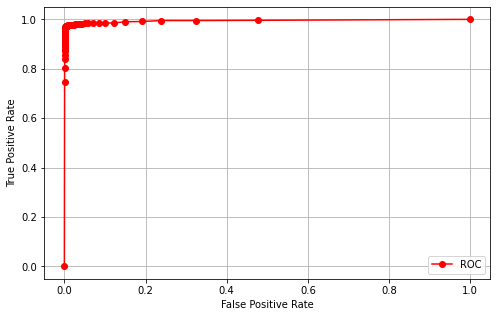

In [72]:
# plot the roc curve for the model
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr,marker='o',color='Red',label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()

In [ ]:
result=pd.DataFrame({
'model':['LogisticRegression','SVC','KNeighborsClassifier','GaussianNB',
'DecisionTree','RandomForest','AdaBoostClassifier','XGBoost','Voting_Classifier'],

'Accuracy_score':[lr_score,svc_score,knn_score,nb_score,dtree_score,rf_score,ada_score,xgb_score,vtc_score],

'Precision_score':[precision_score_lr,precision_score_svc,precision_score_knn,precision_score_nb,
                   precision_score_dt,precision_score_rf,precision_score_ada,precision_score_xgb,precision_score_vtc],

'recall_score':[recall_score_lr,recall_score_svc,recall_score_knn,recall_score_nb,recall_score_dt,
                recall_score_rf,recall_score_ada,recall_score_xgb,recall_score_vtc],

'f1_score':[f1_score_lr,f1_score_svc,f1_score_knn,f1_score_nb,f1_score_dt,f1_score_rf,f1_score_ada,f1_score_xgb,f1_score_vtc],

'roc_auc_score':[roc_auc_score_lr,roc_auc_score_svc,roc_auc_score_knn,roc_auc_score_nb,
              roc_auc_score_dt,roc_auc_score_rf,roc_auc_score_ada,roc_auc_score_xgb,roc_auc_score_vtc],

},index=range(1,10))

In [ ]:
result = result.round(decimals = 4)
result

,model,Accuracy_score,Precision_score,recall_score,f1_score,roc_auc_score
1,LogisticRegression,0.7918,0.5790,0.3565,0.4413,0.6394
2,SVC,0.9051,0.8376,0.7303,0.7802,0.8439
3,KNeighborsClassifier,0.9260,0.8048,0.9051,0.8520,0.9188
4,GaussianNB,0.7920,0.5442,0.7153,0.6181,0.7655
5,DecisionTree,0.9657,0.8867,0.8867,0.8867,0.9259
6,RandomForest,0.9790,0.9893,0.9207,0.9538,0.9588
7,AdaBoostClassifier,0.9880,0.9884,0.9632,0.9756,0.9798
8,XGBoost,0.9847,0.9714,0.9632,0.9673,0.9772
9,Voting_Classifier,0.9250,0.9462,0.7224,0.8193,0.8549


In [ ]:
# Maximum scores from  all models
max_score =result.iloc[:,1:6].max()
max_score

Accuracy_score     0.9880
Precision_score    0.9893
recall_score       0.9632
f1_score           0.9756
roc_auc_score      0.9798
dtype: float64

**Base on the above maximum scores,Final Best Model for these Dataset is AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict(X_test)

# 3. Prediction on Test Data

In [ ]:
# comparing actual values with predicted values
result=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
result.sample(10)

,Actual,Predicted
11346,0,0
14578,1,1
13379,0,0
4863,0,0
4921,0,0
9808,0,0
4062,0,0
1783,1,1
4192,0,0
14041,0,0


### By observing the above prediction we can say that our Model is Best for the Accurate Prediction
**Also, I can conclude that it gives the almost 99% correct prediction**

# 4. Prediction on new features

In [ ]:
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
def prediction(satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary):
    corr_pred=int(ada_clf.predict([[satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary]]))
    if corr_pred == 0:
        print("Employee will not Left")
    else:
        print("Employee will Left")

In [ ]:
prediction(0.77,0.76,4,250,4,5,0,3,0)

Employee will not Left


In [ ]:
prediction(0.10,0.1,5,250,1,10,0,0,0)

Employee will Left


## Conclusion :
- The best fit model our data is AdaBoost Classifier.
- The base_estimator for this classifier is RandomForestClassifier
- From this model we get test accuracy 98.80 %, precision 98.84 %, recall 97.56 %, f1_score 97.56 % & the roc_auc score 97.98 %
- Best probability cutoff for this model is 0.5.